In [739]:
#Se importan las librerías que serán de utilidad
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [740]:
#Se utiliza el método .read_csv para importar los datos entregados en forma de DataFrame
users = pd.read_csv("users.csv")
usersRaw = pd.read_csv("users_raw.csv")

In [741]:
users.columns

Index(['user_id', 'desired_state', 'last_role', 'dreamt_companies',
       'forms_to_work', 'benefits_sought', 'my_languages', 'last_study',
       'level_last_study', 'interested_areas', 'knowledges', 'skills',
       'softwares_or_programs', 'methodologies', 'roles', 'received_messages',
       'sent_messages', 'num_resumes_created', 'events_scheduled',
       'views_to_resume_received', 'views_to_profile_received',
       'saved_from_playlist', 'reactions_received', 'average_feedback',
       'selector_appearances', 'reactiones_made', 'match_with_playlists',
       'contents_viewed', 'connections_sent'],
      dtype='object')

In [742]:
#Se cambia el nombre de la columna a la que se asigna el id de manera que puedan unirse ambas tablas
users.columns = ['id', 'desired_state', 'last_role', 'dreamt_companies',
       'forms_to_work', 'benefits_sought', 'my_languages', 'last_study',
       'level_last_study', 'interested_areas', 'knowledges', 'skills',
       'softwares_or_programs', 'methodologies', 'roles', 'received_messages',
       'sent_messages', 'num_resumes_created', 'events_scheduled',
       'views_to_resume_received', 'views_to_profile_received',
       'saved_from_playlist', 'reactions_received', 'average_feedback',
       'selector_appearances', 'reactiones_made', 'match_with_playlists',
       'contents_viewed', 'connections_sent']

In [743]:
#Se unen ambas tablas estableciendo en común el id, el tipo de unión es "inner" lo que trae los elementos en común de ambas tablas
joinUsers = pd.merge(users, usersRaw, on = "id", how = "inner")
joinUsers

,id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,...,reactiones_made,match_with_playlists,contents_viewed,connections_sent,created_at,birthdate,gender,city,state,profile_completed
0,1.0,freelancer,CTO,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_re...","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingeniería de Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnolog...",...,NaN,NaN,NaN,2.0,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0
1,9670.0,entrepreneur,Líder en gestión de procesos,"['https://www.rutanmedellin.org/es/', 'http://...","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarshi...",[],Tecnología en sistemas electromecánicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología',...",...,NaN,NaN,NaN,NaN,2017-08-08 10:04:57,1998-02-17,F,Medellín,Antioquia,66.0
2,23825.0,employment,Líder de proyectos Masivos,"['https://www.medtronic.com/co-es/index.html',...","['virtual', 'in_house', 'mixed']","['flexible_schedules', 'study_opportunities', ...",[],Bioingeniería,NaN,"['Starups', 'Marketing Digital Móvil', 'Progra...",...,NaN,NaN,NaN,NaN,2019-04-10 16:57:08,1985-06-27,M,Medellín,Antioquia,59.0
3,2245.0,employment,Lider de desarollo,"[None, None, None]",[],[],"[[None, None, None]]",Ingeniería de Sistemas,other,"['Desarrollo de software', 'asf;aslkf;aslkfa;s...",...,NaN,NaN,NaN,5.0,2016-07-25 10:37:25,1992-10-19,M,Medellín,Antioquia,48.0
4,24328.0,freelancer,Diseñadora Gráfica Freelancer,"['https://www.kalley.com.co/', 'https://www.ma...",['virtual'],"['study_opportunities', 'flexible_schedules', ...","[[None, None, None]]",Gestión Del Diseño Gráfico,other,"['Diseño gráfico', 'Mercadeo', 'marketing digi...",...,NaN,NaN,NaN,2.0,2019-06-27 12:35:22,2001-05-09,F,Medellín,Antioquia,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16184,1957325.0,employment,Analista de Datos,"['Google, amazon,']","['remote', 'in_house', 'mixed']","['study_opportunities', 'flexible_schedules', ...","[['EN', 'intermediate', None]]",Ingeniería de Producción,undergraduate,"['Operaciones Y Logística', 'Tecnología', 'Adm...",...,NaN,NaN,NaN,NaN,2023-04-14 16:19:33,NaN,NaN,Bogotá,Cundinamarca,70.0
16185,1957347.0,first_job,Diseñadora gráfica,"['Google', 'facebook']","['virtual', 'flexible', 'per_hours']","['study_opportunities', 'flexible_schedules', ...","[['EN', 'basic']]",Diseño industrial,undergraduate,"['Diseño', 'Diseño Grafico', 'Experiencia de...",...,2.0,NaN,NaN,NaN,2023-04-15 09:36:45,1997-08-05,F,Floridablanca,Santander,52.0
16186,1957363.0,freelancer,"Periodista, reportero e investigador","['BBC', 'The Guardian', 'Cambio Colombia']",['mixed'],"['salary_increase', 'flexible_schedules', 'per...","[['ES', 'advanced', None], ['EN', 'advanced']]",Periodismo,master_degree,"['Investigación', 'Comunicación Organizacional...",...,NaN,NaN,NaN,NaN,2023-04-15 16:03:38,NaN,NaN,Cali,Valle del Cauca,51.0
16187,1957391.0,freelancer,Diseñador gráfico,['Organizaciones con trabajo remoto'],[],['bonuses'],"[['ES', 'advanced', None], ['SIMPLE', 'basic']]",Diseño gráfico,undergraduate,"['Diseño Grafico', 'Ilustración', 'Redes Soci...",...,NaN,NaN,NaN,NaN,2023-04-17 12:23:43,NaN,NaN,Cali,Valle del Cauca,44.0


In [744]:
#Se ordena la tabla por medio de su id
joinUsers.sort_values(by="id", inplace = True)

<AxesSubplot: >

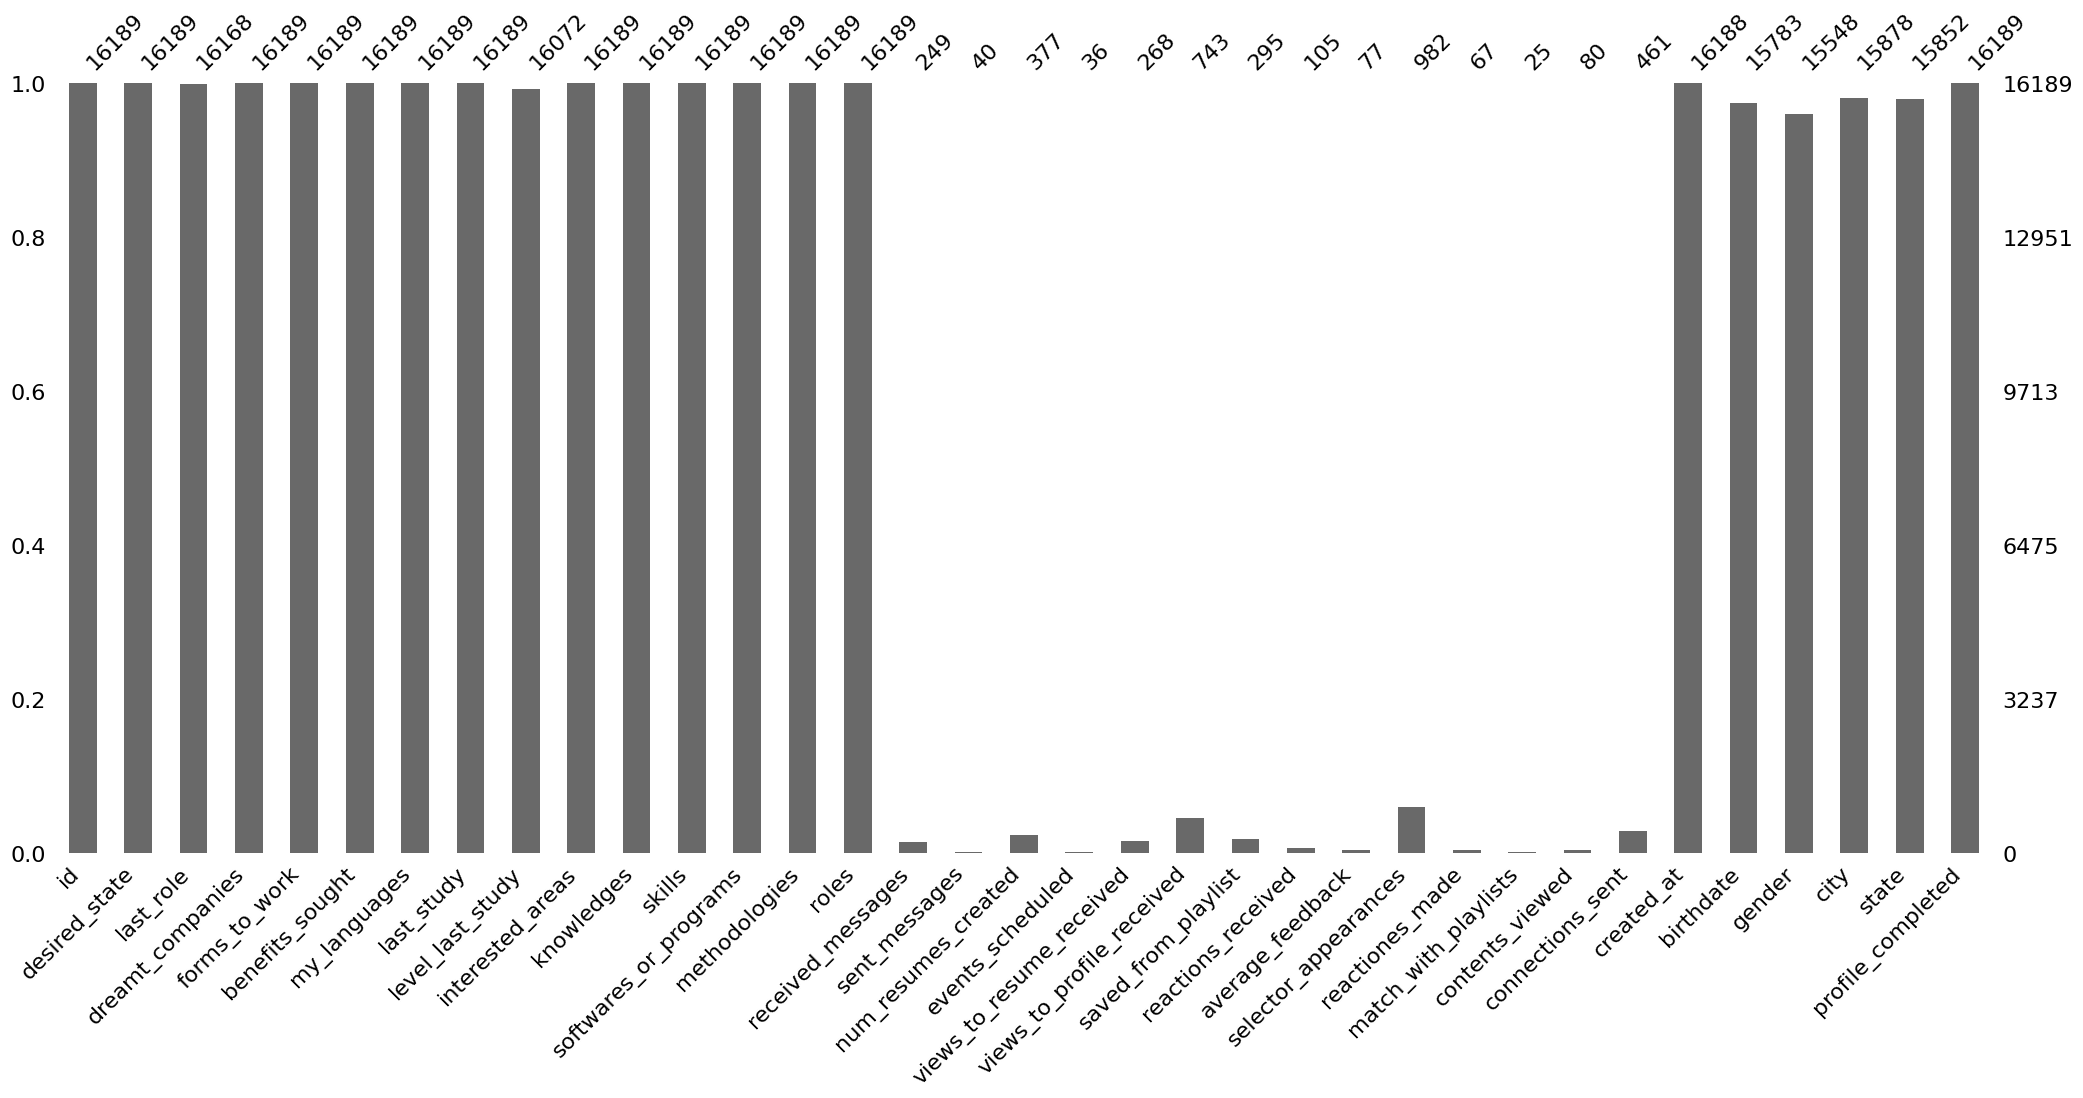

In [745]:
#Haciendo uso de la libreria missingno, se visualiza un gráfico que permite identificar los casos en los que más se encuentran datos de tipo NaN
msno.bar(joinUsers)

In [746]:
#Se eliminan de los datos aquellas columnas que no aportan mayor información en el paso siguiente (Insight Discovery)
joinUsers.drop(["received_messages", "sent_messages", "num_resumes_created", "events_scheduled", "views_to_profile_received", "saved_from_playlist", "selector_appearances", "reactiones_made", "match_with_playlists", "contents_viewed"], axis=1)

,id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,...,views_to_resume_received,reactions_received,average_feedback,connections_sent,created_at,birthdate,gender,city,state,profile_completed
0,1.0,freelancer,CTO,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_re...","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingeniería de Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnolog...",...,NaN,NaN,4.75,2.0,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0
19,12.0,entrepreneur,CEO,['Google'],"['mixed', 'virtual']","['flexible_schedules', 'personal_recognition',...","[['EN', 'advanced']]",Business Management,other,"['Tecnología', 'Educación', 'Talento', 'Formac...",...,NaN,NaN,4.63,10.0,2016-01-07 18:10:23,1980-11-25,M,Medellín,Antioquia,100.0
847,112.0,employment,Auxiliar Administrativa,"['https://gruponutresa.com/', 'https://www.seg...","['in_house', 'virtual', 'mixed']","['study_opportunities', 'flexible_schedules', ...",[],Administradora de Negocios,undergraduate,"['Gestión Humana', 'Seguridad y Salud en el Tr...",...,NaN,NaN,NaN,NaN,2016-01-18 17:28:56,1995-07-17,F,Envigado,Antioquia,84.0
7,121.0,employment,Líder Talento,"['https://cristianrestrepoq.wordpress.com', 'h...","['in_house', 'mixed', 'virtual']","['study_opportunities', 'flexible_schedules', ...","[['EN', 'advanced'], ['FR', 'basic', None]]",Administración de Empresas,other,"['Marketing', 'Diseño de Experiencias', 'Model...",...,NaN,NaN,4.11,5.0,2016-01-18 17:28:57,1996-06-01,M,Medellín,Antioquia,100.0
201,169.0,employment,Coordinador de Sistemas,"['bancolombia', 'personalsoft']","['in_house', 'virtual', 'mixed']","['bonuses', 'study_opportunities', 'flexible_s...","[['EN', 'intermediate', None], [None, None, No...",Especialización Gerencia Informática,other,"['Coordinación', 'Desarrollo de Software', 'Ba...",...,NaN,NaN,NaN,2.0,2016-01-18 17:29:03,1985-12-19,M,Medellin,Antioquia,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16184,1957325.0,employment,Analista de Datos,"['Google, amazon,']","['remote', 'in_house', 'mixed']","['study_opportunities', 'flexible_schedules', ...","[['EN', 'intermediate', None]]",Ingeniería de Producción,undergraduate,"['Operaciones Y Logística', 'Tecnología', 'Adm...",...,NaN,NaN,NaN,NaN,2023-04-14 16:19:33,NaN,NaN,Bogotá,Cundinamarca,70.0
16185,1957347.0,first_job,Diseñadora gráfica,"['Google', 'facebook']","['virtual', 'flexible', 'per_hours']","['study_opportunities', 'flexible_schedules', ...","[['EN', 'basic']]",Diseño industrial,undergraduate,"['Diseño', 'Diseño Grafico', 'Experiencia de...",...,NaN,1.0,NaN,NaN,2023-04-15 09:36:45,1997-08-05,F,Floridablanca,Santander,52.0
16186,1957363.0,freelancer,"Periodista, reportero e investigador","['BBC', 'The Guardian', 'Cambio Colombia']",['mixed'],"['salary_increase', 'flexible_schedules', 'per...","[['ES', 'advanced', None], ['EN', 'advanced']]",Periodismo,master_degree,"['Investigación', 'Comunicación Organizacional...",...,NaN,NaN,NaN,NaN,2023-04-15 16:03:38,NaN,NaN,Cali,Valle del Cauca,51.0
16187,1957391.0,freelancer,Diseñador gráfico,['Organizaciones con trabajo remoto'],[],['bonuses'],"[['ES', 'advanced', None], ['SIMPLE', 'basic']]",Diseño gráfico,undergraduate,"['Diseño Grafico', 'Ilustración', 'Redes Soci...",...,NaN,NaN,NaN,NaN,2023-04-17 12:23:43,NaN,NaN,Cali,Valle del Cauca,44.0


In [747]:
#Dentro de las opciones otorgadas, se inicia con los 5 roles con mayor average feedback diferenciados por género (En este caso, se resaltan tres descubrimientos)
Discovery = joinUsers[["roles", "gender", "average_feedback"]].dropna().sort_index()
Discovery

,roles,gender,average_feedback
0,[],M,4.75
7,"['Diseñador de metodologías', 'Líder Identific...",M,4.11
17,['lider de proyectos'],F,3.50
19,[],M,4.63
41,"['Investigador, planeador', 'Comprobador de ca...",M,1.50
...,...,...,...
4896,[],M,4.00
4897,[],F,5.00
6227,"['Analista', 'Profesor y/o orientador', 'Coord...",M,1.00
9856,"['Diseñador de logaritmos para IoT', 'Scrum Ma...",M,4.50


In [748]:
#El primer descubrimiento de este caso se relaciona con la proporción entre el average feedback y el género ya que permite relacionar que dentro del top 10, tan solo el 30% corresponde a participación del género femenino
firstDiscovery = Discovery[Discovery["roles"] != "[]"]
firstDiscovery.sort_values(by = "average_feedback", ascending = False).head(10)

,roles,gender,average_feedback
1226,['Consultor BI - DDDM Process'],M,5.00
996,['Desarrollador Front-end'],M,5.00
65,['Líder Innovación y Transformación Digital'],M,5.00
1844,"['Más prueba', 'Diseñadora UX']",F,5.00
1842,"['Desarrollador de software', 'Desarrollador J...",M,5.00
1830,['Desarrollador Junior'],M,5.00
1206,['Developer'],M,5.00
480,['Consultor Empaques ecológicos'],M,5.00
463,['Coordinador/Líder de Sistemas de Gestión Int...,F,4.75
1100,['CEO en una empresa Legaltech'],F,4.75


In [749]:
#En este caso, se relaciona el top 5 de roles para el género femenino con mayor average feedback
secondDiscovery = Discovery[Discovery["roles"] != "[]"]
secondDiscovery[secondDiscovery["gender"] == "F"].sort_values(by = "average_feedback", ascending = False).head(5)

,roles,gender,average_feedback
1844,"['Más prueba', 'Diseñadora UX']",F,5.00
463,['Coordinador/Líder de Sistemas de Gestión Int...,F,4.75
1100,['CEO en una empresa Legaltech'],F,4.75
1224,['Desarrolladora web junior'],F,4.67
768,['Dirección'],F,4.60


In [750]:
#En este caso, se relaciona el top 5 de roles para el género masculino con mayor average feedback
thirdDiscovery = Discovery[Discovery["roles"] != "[]"]
thirdDiscovery[thirdDiscovery["gender"] == "M"].sort_values(by = "average_feedback", ascending = False).head(5)

,roles,gender,average_feedback
480,['Consultor Empaques ecológicos'],M,5.0
1206,['Developer'],M,5.0
65,['Líder Innovación y Transformación Digital'],M,5.0
1226,['Consultor BI - DDDM Process'],M,5.0
996,['Desarrollador Front-end'],M,5.0


In [751]:
#En este caso, se representan el top 5 de las dreamt companies frente a usuarios con más de 10 connetions sent
Discovery2 = joinUsers[["dreamt_companies", "desired_state", "level_last_study", "connections_sent"]].dropna().sort_index()
firstDiscovery2 = Discovery2[Discovery2["dreamt_companies"] != "[]"]
firstDiscovery2[firstDiscovery2["connections_sent"] > 10].sort_values(by = "connections_sent", ascending = False)


,dreamt_companies,desired_state,level_last_study,connections_sent
11009,['https:www.venturatravel.org/'],freelancer,undergraduate,394.0
13478,['https://www.talentpitch.co/'],entrepreneur,undergraduate,69.0
13209,"[None, 'https://boweryfarming.com/', 'https://...",employment,undergraduate,50.0
11804,['Apple'],first_job,master_degree,15.0
2984,['Facebook'],employment,technologist,13.0


In [752]:
#El último caso realizado de los insight Discovery es el que relaciona las 3 skills más comunes con usuarios con un average feedback mayor que 5 y su último estudio
Discovery3 = joinUsers[["skills", "average_feedback", "last_study"]].dropna().sort_index()
firstDiscovery3_1 = Discovery3[Discovery3["skills"] != "[]"]
firstDiscovery3 = firstDiscovery3_1[firstDiscovery3_1["average_feedback"] != "[]"]
firstDiscovery3[firstDiscovery3["average_feedback"] > 4]
firstDiscovery3.sort_values(by = "average_feedback", ascending = False, inplace = True)
firstDiscovery3.head(3)

,skills,average_feedback,last_study
1830,"['Apoyar', 'Comercial', 'Actitud Positiva', 'A...",5.0,Ingeniero mecanico
1842,"['Rápido Aprendizaje', 'Capacidad de Trabajar ...",5.0,Ingeniería de Sistemas
996,"['Paciencia', 'Música', 'Responsabilidad', 'Pl...",5.0,Programación de software


In [753]:
#El primer caso para visualización escogido es el scatter plot de age vs Average feedback
firstVisualization = joinUsers[["birthdate", "average_feedback"]].dropna()
firstVisualization

,birthdate,average_feedback
0,1978-11-13,4.75
19,1980-11-25,4.63
7,1996-06-01,4.11
65,1986-10-27,5.00
628,1999-03-06,4.00
...,...,...
4896,1991-04-29,4.00
4897,1993-11-02,5.00
6227,1995-12-14,1.00
9856,1966-01-18,4.50


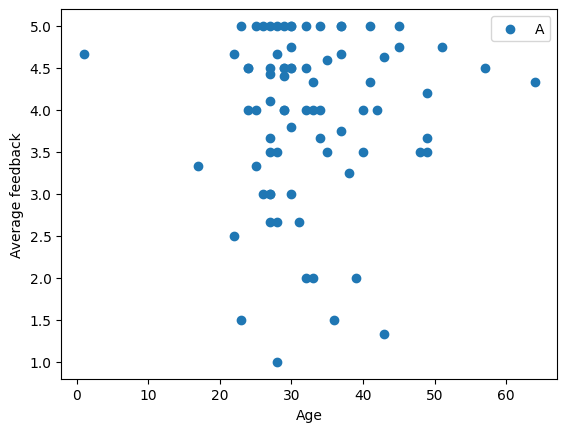

In [754]:
#Se calcula la edad del usuario para poder graficarse VS el average feedback, apliando una función a la columna correspondiente y agregando una nueva
def birthdate_to_year(row):
    return 2023 - int(row["birthdate"].split("-")[0])

firstVisualization["age"] = firstVisualization.apply(birthdate_to_year, axis=1)
#En este paso, se hace uso de la librería Numpy, para graficar los ejes Age y feedback
age = np.array(firstVisualization["age"])

feedBack = np.array(firstVisualization["average_feedback"])
plt.scatter(age, feedBack)
plt.xlabel("Age")
plt.ylabel("Average feedback")
plt.legend("Age VS Average feedback")
plt.show()